In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Layer, BatchNormalization, GlobalAveragePooling2D 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from PIL import Image 
import cv2
import os
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical   

In [3]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd

In [4]:
# ensure consistency across runs
np.random.seed(1)
tf.random.set_seed(1)

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
MAIN_DIR = "NA_Fish_Dataset/"
fish_classes = [name for name in os.listdir(MAIN_DIR) if os.path.isdir(os.path.join(MAIN_DIR, name))]
fish_classes

['Sea Bass',
 'Red Mullet',
 'Gilt Head Bream',
 'Red Sea Bream',
 'Shrimp',
 'Black Sea Sprat',
 'Horse Mackerel',
 'Striped Red Mullet',
 'Trout']

In [7]:
image_files = []
image_classes = []
import pdb
for f_class in fish_classes:
    for files in os.listdir(os.path.join(MAIN_DIR,f_class)):
        if files[-3:] == 'png':
            image_files.append(os.path.join(MAIN_DIR,f_class,files))
            image_classes.append(f_class)

In [8]:
fish_data = pd.DataFrame({'path':image_files, 'class':image_classes, })
dum_df = pd.get_dummies(fish_data["class"])
label_columns = dum_df.columns
fish_data = fish_data.join(dum_df)
fish_data

,path,class,Black Sea Sprat,Gilt Head Bream,Horse Mackerel,Red Mullet,Red Sea Bream,Sea Bass,Shrimp,Striped Red Mullet,Trout
0,NA_Fish_Dataset/Sea Bass/48.png,Sea Bass,0,0,0,0,0,1,0,0,0
1,NA_Fish_Dataset/Sea Bass/49.png,Sea Bass,0,0,0,0,0,1,0,0,0
2,NA_Fish_Dataset/Sea Bass/8.png,Sea Bass,0,0,0,0,0,1,0,0,0
3,NA_Fish_Dataset/Sea Bass/9.png,Sea Bass,0,0,0,0,0,1,0,0,0
4,NA_Fish_Dataset/Sea Bass/14.png,Sea Bass,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
424,NA_Fish_Dataset/Trout/00029.png,Trout,0,0,0,0,0,0,0,0,1
425,NA_Fish_Dataset/Trout/00015.png,Trout,0,0,0,0,0,0,0,0,1
426,NA_Fish_Dataset/Trout/00001.png,Trout,0,0,0,0,0,0,0,0,1
427,NA_Fish_Dataset/Trout/00014.png,Trout,0,0,0,0,0,0,0,0,1


In [9]:
train_data , test_data = train_test_split(fish_data, test_size=0.2, stratify=fish_data["class"])

In [10]:
train_data.shape,test_data.shape,fish_data.shape

((343, 11), (86, 11), (429, 11))

In [11]:
train_data

,path,class,Black Sea Sprat,Gilt Head Bream,Horse Mackerel,Red Mullet,Red Sea Bream,Sea Bass,Shrimp,Striped Red Mullet,Trout
35,NA_Fish_Dataset/Sea Bass/4.png,Sea Bass,0,0,0,0,0,1,0,0,0
210,NA_Fish_Dataset/Shrimp/00019.png,Shrimp,0,0,0,0,0,0,1,0,0
230,NA_Fish_Dataset/Shrimp/00038.png,Shrimp,0,0,0,0,0,0,1,0,0
426,NA_Fish_Dataset/Trout/00001.png,Trout,0,0,0,0,0,0,0,0,1
8,NA_Fish_Dataset/Sea Bass/17.png,Sea Bass,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
392,NA_Fish_Dataset/Striped Red Mullet/00029.png,Striped Red Mullet,0,0,0,0,0,0,0,1,0
362,NA_Fish_Dataset/Striped Red Mullet/00024.png,Striped Red Mullet,0,0,0,0,0,0,0,1,0
16,NA_Fish_Dataset/Sea Bass/21.png,Sea Bass,0,0,0,0,0,1,0,0,0
335,NA_Fish_Dataset/Horse Mackerel/00013.png,Horse Mackerel,0,0,1,0,0,0,0,0,0


In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 250, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 53824)             0

In [12]:
#train_datagen = ImageDataGenerator(
#        rescale=1./255,
#        validation_split= 0.2)
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      horizontal_flip=True,
      vertical_flip=True,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      validation_split= 0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_dataframe(
    train_data,  x_col='path', y_col=label_columns,
    target_size=(250, 250), color_mode='rgb',
    class_mode='raw', batch_size=64, subset='training',seed = 1
    
    )
val_generator = train_datagen.flow_from_dataframe(
    train_data,  x_col='path', y_col=label_columns,
    target_size=(250, 250), color_mode='rgb',
    class_mode='raw', batch_size=64,subset='validation',seed = 1
        )

test_generator = test_datagen.flow_from_dataframe(
    test_data, x_col='path', y_col=label_columns,
    target_size=(250, 250), color_mode='rgb',seed = 1,
    class_mode="raw", batch_size=64,shuffle=False
    )

Found 275 validated image filenames.
Found 68 validated image filenames.
Found 86 validated image filenames.


In [45]:
tf.keras.backend.clear_session()
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001)
#model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate=0.0005), metrics = ["accuracy"])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),loss='categorical_crossentropy',metrics=["accuracy"])
model_history = model.fit(train_generator,epochs=25,callbacks = [reduce_lr],validation_data = val_generator)

Epoch 1/25
5/5 [==============================] - 32s 6s/step - loss: 3.7924 - accuracy: 0.1455 - val_loss: 2.5471 - val_accuracy: 0.0588 - lr: 5.0000e-04
Epoch 2/25
5/5 [==============================] - 32s 6s/step - loss: 2.2783 - accuracy: 0.1236 - val_loss: 2.2110 - val_accuracy: 0.0441 - lr: 5.0000e-04
Epoch 3/25
5/5 [==============================] - 32s 6s/step - loss: 2.1949 - accuracy: 0.1309 - val_loss: 2.1979 - val_accuracy: 0.0588 - lr: 5.0000e-04
Epoch 4/25
5/5 [==============================] - 31s 6s/step - loss: 2.1663 - accuracy: 0.1818 - val_loss: 2.1519 - val_accuracy: 0.2500 - lr: 5.0000e-04
Epoch 5/25
5/5 [==============================] - 37s 7s/step - loss: 2.1223 - accuracy: 0.1709 - val_loss: 2.1340 - val_accuracy: 0.2059 - lr: 5.0000e-04
Epoch 6/25
5/5 [==============================] - 31s 6s/step - loss: 2.0574 - accuracy: 0.2873 - val_loss: 2.0592 - val_accuracy: 0.1765 - lr: 5.0000e-04
Epoch 7/25
5/5 [==============================] - 32s 6s/step - loss: 

In [14]:
model.save('model_new.h5')

NameError: name 'model' is not defined

In [15]:
model = tf.keras.models.load_model('model1_aug.h5')
scoreSeg = model.evaluate(x=val_generator,verbose =1)

2/2 [==============================] - 0s 20ms/step - loss: 1.0298 - acc: 0.6618


In [16]:
scoreSeg

[1.0298269987106323, 0.6617646813392639]

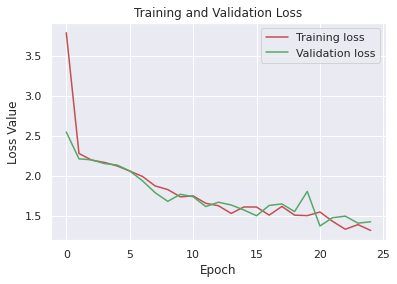

In [54]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
EPOCHS =25
epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

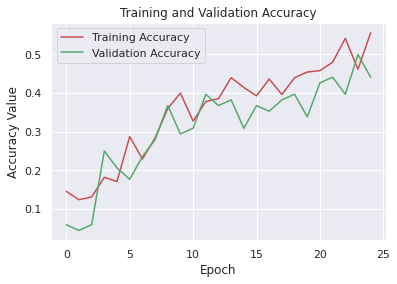

In [72]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
         
plt.figure()
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

In [56]:
test_predictions = model.predict(test_generator)
test_predictions = np.argmax(test_predictions, axis=1)

In [57]:
test_gt = np.argmax(test_generator.labels, axis=1)
test_gt

array([8, 7, 7, 4, 4, 7, 7, 3, 3, 4, 5, 3, 0, 0, 2, 1, 6, 1, 4, 5, 7, 7,
       1, 6, 4, 4, 3, 6, 3, 0, 6, 1, 5, 2, 6, 2, 2, 2, 2, 6, 5, 0, 8, 8,
       1, 5, 2, 5, 4, 0, 1, 8, 7, 2, 6, 4, 0, 4, 6, 0, 3, 0, 7, 1, 7, 5,
       0, 2, 6, 1, 5, 5, 3, 2, 1, 0, 5, 8, 3, 8, 7, 3, 6, 1, 3, 4])

In [58]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_gt, test_predictions))

0.872093023255814


In [64]:
#Plots a confusion matrix of our best model 
"""
from sklearn.metrics import plot_confusion_matrix
title = "Confusion Matrix"
fig, ax2 = plt.subplots(figsize=(9, 9))
plot_confusion_matrix(model, test_gt, test_predictions,
                                 cmap=plt.cm.Blues, 
                                 ax=ax2,
                                 normalize='False'
                                )
ax2.set_title(title)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.savefig('normalized_conf_matrix.png')
plt.show()
"""

'\nfrom sklearn.metrics import plot_confusion_matrix\ntitle = "Confusion Matrix"\nfig, ax2 = plt.subplots(figsize=(9, 9))\nplot_confusion_matrix(model, test_gt, test_predictions,\n                                 cmap=plt.cm.Blues, \n                                 ax=ax2,\n                                 normalize=\'False\'\n                                )\nax2.set_title(title)\nplt.xticks(rotation = 45)\nplt.yticks(rotation = 45)\nplt.savefig(\'normalized_conf_matrix.png\')\nplt.show()\n'

In [73]:
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
"""

'\ndef plot_confusion_matrix(cm, classes,\n                          normalize=False,\n                          title=\'Confusion matrix\',\n                          cmap=plt.cm.Blues):\n    \n    This function prints and plots the confusion matrix.\n    Normalization can be applied by setting `normalize=True`.\n    \n    plt.imshow(cm, interpolation=\'nearest\', cmap=cmap)\n    plt.title(title)\n    plt.colorbar()\n    tick_marks = np.arange(len(classes))\n    plt.xticks(tick_marks, classes, rotation=45)\n    plt.yticks(tick_marks, classes)\n\n    if normalize:\n        cm = cm.astype(\'float\') / cm.sum(axis=1)[:, np.newaxis]\n        print("Normalized confusion matrix")\n    else:\n        print(\'Confusion matrix, without normalization\')\n\n    print(cm)\n\n    thresh = cm.max() / 2.\n    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):\n        plt.text(j, i, cm[i, j],\n                 horizontalalignment="center",\n                 color="white" if cm[i,

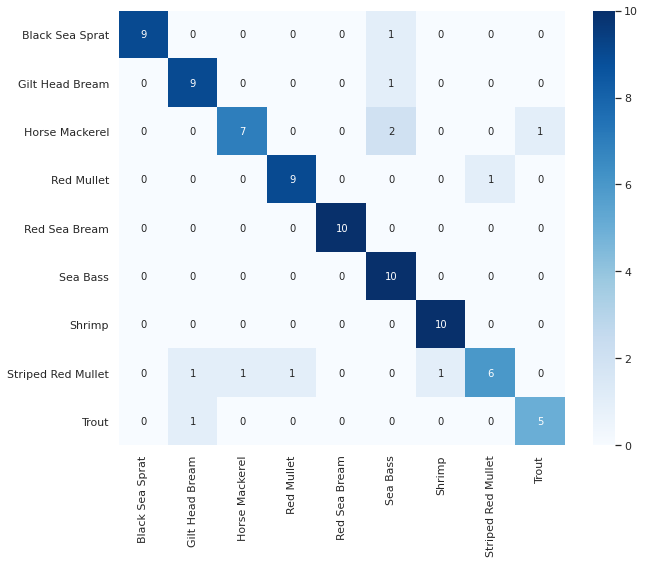

In [71]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sn

cnf_matrix = confusion_matrix(test_gt, test_predictions)
df_cm = pd.DataFrame(cnf_matrix,label_columns,label_columns)
plt.figure(figsize=(10,8))
sn.set(font_scale=1.0) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10},fmt='d',cmap=plt.cm.Blues) # font size

#plt.xticks(rotation = 45)
#plt.yticks(rotation = 45)
#plt.savefig('normalized_conf_matrix.png')
plt.show()

In [80]:
print(label_columns)
from sklearn import metrics
print(metrics.classification_report(test_gt, test_predictions))

Index(['Black Sea Sprat', 'Gilt Head Bream', 'Horse Mackerel', 'Red Mullet',
       'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout'],
      dtype='object')
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.82      0.90      0.86        10
           2       0.88      0.70      0.78        10
           3       0.90      0.90      0.90        10
           4       1.00      1.00      1.00        10
           5       0.71      1.00      0.83        10
           6       0.91      1.00      0.95        10
           7       0.86      0.60      0.71        10
           8       0.83      0.83      0.83         6

    accuracy                           0.87        86
   macro avg       0.88      0.87      0.87        86
weighted avg       0.88      0.87      0.87        86

